### Lab 2 Task 3

Датасет https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chechelyk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chechelyk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chechelyk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chechelyk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


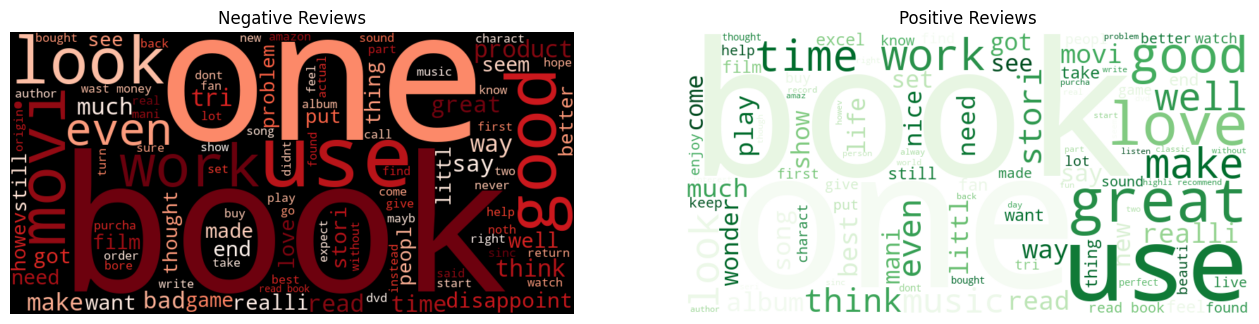

Accuracy: 0.8764
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88      9966
    Positive       0.87      0.88      0.88     10034

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Завантаження навчального і тестового датасетів
train_df = pd.read_csv('../data/train.csv', header=None, names=['label', 'title', 'text'])
train_df['full_text'] = train_df['title'].astype(str) + " " + train_df['text'].astype(str)
train_df['label'] = train_df['label'].apply(lambda x: 0 if x == 1 else 1)

test_df = pd.read_csv('../data/test.csv', header=None, names=['label', 'title', 'text'])
test_df['full_text'] = test_df['title'].astype(str) + " " + test_df['text'].astype(str)
test_df['label'] = test_df['label'].apply(lambda x: 0 if x == 1 else 1)


# Обмеження розміру, адже в обраних датасетах великий об'єм даних 
train_df = train_df.sample(n=100000, random_state=42)
test_df = test_df.sample(n=20000, random_state=42)

# Налаштування інструментів обробки тексту
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    processed = [stemmer.stem(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(processed)

train_df['clean_text'] = train_df['full_text'].apply(preprocess_text)
test_df['clean_text'] = test_df['full_text'].apply(preprocess_text)

# Генерація WordCloud
plt.figure(figsize=(16, 8))

# Негативні відгуки
text_neg = " ".join(train_df[train_df['label'] == 0]['clean_text'])
wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds', max_words=100).generate(text_neg)

plt.subplot(1, 2, 1)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title("Negative Reviews")
plt.axis('off')

# Позитивні відгуки
text_pos = " ".join(train_df[train_df['label'] == 1]['clean_text'])
wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens', max_words=100).generate(text_pos)

plt.subplot(1, 2, 2)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title("Positive Reviews")
plt.axis('off')

plt.show()

# Векторизація даних
tfidf = TfidfVectorizer(max_features=20000)
X_train = tfidf.fit_transform(train_df['clean_text'])
y_train = train_df['label']

X_test = tfidf.transform(test_df['clean_text'])
y_test = test_df['label']

# Навчання моделі
model = LogisticRegression(n_jobs=-1)
model.fit(X_train, y_train)

# Оцінка якості на тестовому наборі
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))